# MOC computation

If you would like to try to repeat examples from this introduction, you can download FESOM2 data and mesh. The data are quite heavy, about 1.5Gb in bzip2 archive.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download `LCORE2.tar` and `core2.tar.bz2` archives and extract them.


Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

In [1]:
import pyfesom2 as pf
import matplotlib.cm as cm
import matplotlib.pylab as plt
import numpy as np

In [3]:
mesh = pf.load_mesh('/Users/nkolduno/PYTHON/DATA/core2/')

/Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2


In [6]:
data = pf.get_data('../../DATA/LCORE2/', 'w', range(1950,1957), mesh, how="mean", compute=True )

Depth is None, 3d field will be returned


In [7]:
data.shape

(126858, 48)

Minimum nessesary input is mesh and one 3D field of w.

In [8]:
lats, moc = pf.xmoc_data(mesh, data)

You get latitides and the MOC values (global by default). They can be used to plot the MOC using hofm_plot function:

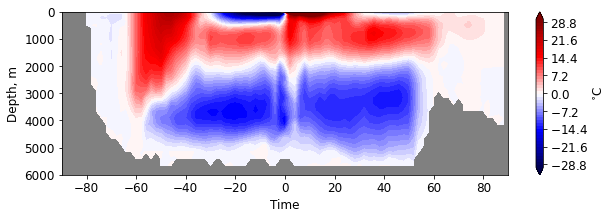

In [9]:
plt.figure(figsize=(10, 3))
pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-30, 30, 51), 
             facecolor='gray')

Increase the number of latitude bins:

In [10]:
lats, moc = pf.xmoc_data(mesh, data, nlats=200)

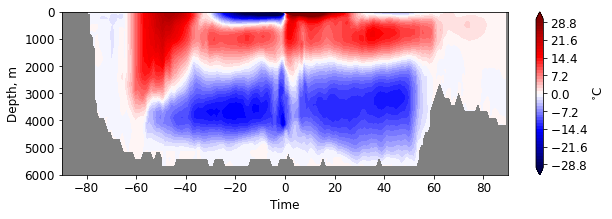

In [11]:
plt.figure(figsize=(10, 3))
pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-30, 30, 51), 
             facecolor='gray')

You can define the region for MOC computation.

In [12]:
lats, moc = pf.xmoc_data(mesh, data, mask="Atlantic_MOC")

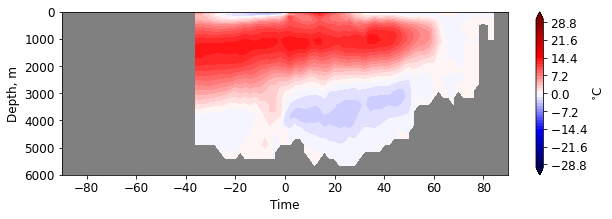

In [13]:
plt.figure(figsize=(10, 3))
pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-30, 30, 51), 
             facecolor='gray')

Regions are listed in documentation of pf.get_mask. Currently they are:

       Ocean Basins:
            "Atlantic_Basin"
            "Pacific_Basin"
            "Indian_Basin"
            "Arctic_Basin"
            "Southern_Ocean_Basin"
            "Mediterranean_Basin"
            "Global Ocean"
            "Global Ocean 65N to 65S"
            "Global Ocean 15S to 15N"
        MOC Basins:
            "Atlantic_MOC"
            "IndoPacific_MOC"
            "Pacific_MOC"
            "Indian_MOC"
        Nino Regions:
            "Nino 3.4"
            "Nino 3"
            "Nino 4"

You can combine masks:

In [14]:
mask1 = pf.get_mask(mesh, "Atlantic_Basin")
mask2 = pf.get_mask(mesh, "Arctic_Basin")
mask3 = mask1|mask2

Check how the masked data looks like:

[<GeoAxesSubplot:>]

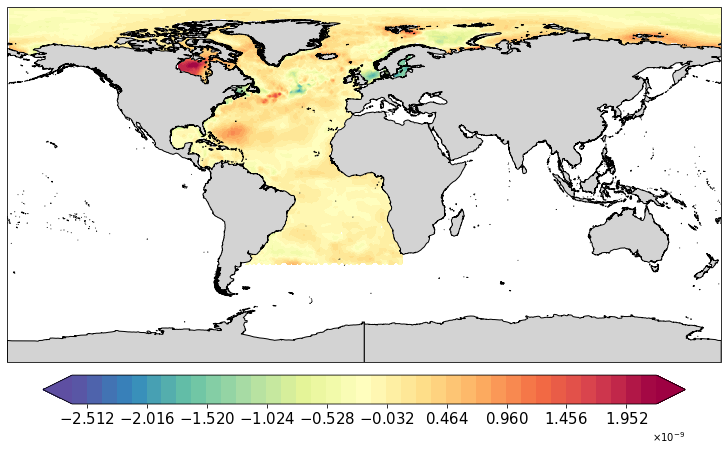

In [15]:
pf.plot(mesh, data[:,0]*mask3)

You can then provide combined mask to `xmoc_data`:

In [16]:
lats, moc = pf.xmoc_data(mesh, data, mask=mask3)

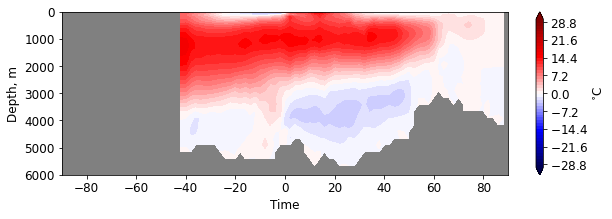

In [17]:
plt.figure(figsize=(10, 3))
pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-30, 30, 51), 
             facecolor='gray')

If you work with large meshes, it makes sence to compute some data beforehand and provide them to the function:

In [18]:
meshdiag = pf.get_meshdiag(mesh)
el_area = meshdiag['elem_area'][:]
nlevels = meshdiag['nlevels'][:]-1
face_x, face_y = pf.compute_face_coords(mesh)
mask = pf.get_mask(mesh, 'Global Ocean')

In [19]:
lats, moc = pf.xmoc_data(mesh, data, mask = mask, 
                el_area = el_area, nlevels=nlevels, 
                face_x=face_x, face_y=face_y)

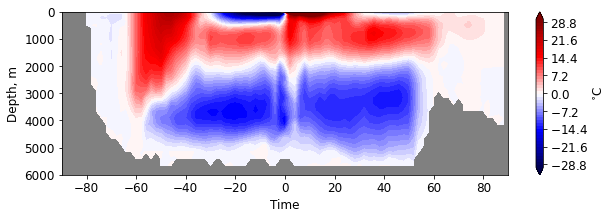

In [20]:
plt.figure(figsize=(10, 3))
pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-30, 30, 51), 
             facecolor='gray')

## Compute AMOC at 26.5N

Open data as time series

In [23]:
data = pf.get_data('../../DATA/LCORE2/', 'w', range(1950,1957), mesh, how="ori", compute=False )

Depth is None, 3d field will be returned


In [24]:
data

<xarray.DataArray 'w' (time: 7, nod2: 126858, nz: 48)>
dask.array<concatenate, shape=(7, 126858, 48), dtype=float32, chunksize=(1, 126858, 48), chunktype=numpy.ndarray>
Coordinates:
  * nz       (nz) float64 0.0 5.0 10.0 20.0 ... 5.4e+03 5.65e+03 6e+03 6.25e+03
  * time     (time) datetime64[ns] 1950-12-31T23:15:00 ... 1956-12-30T23:15:00
Dimensions without coordinates: nod2
Attributes:
    description:  vertical velocity
    long_name:    vertical velocity
    units:        m/s

We have 9 time steps

In [25]:
data.shape

(7, 126858, 48)

Compute AMOC for each time step, increase the number of latitudes if you want to be preciselly at 26.5:

In [26]:
moc = []

for i in range(data.shape[0]):
    lats, moc_time = pf.xmoc_data(mesh, data[i,:,:], mask='Atlantic_MOC', nlats=361)
    moc.append(moc_time)

Find which index corresponds to 26.5

In [27]:
lats[233]

26.5

Compute maximum at this point for each time step:

In [28]:
amoc26 = []
for i in range(len(moc)):
    amoc26.append(moc[i][233,:].max())

In [29]:
amoc26

[13.14148456461645,
 13.35507777426953,
 12.57167469671752,
 13.269322092870274,
 12.887012613028919,
 10.50925987681265,
 12.133871845535186]

You can use time information from original dataset for plotting:

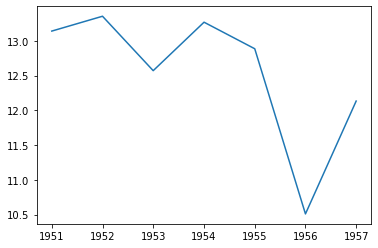

In [30]:
plt.plot(data.time, amoc26)